In [3]:
import os
import sys
sys.path.append(os.path.abspath("../src"))
sys.path.append(os.path.abspath("../lightning_logs"))

In [9]:
from utils_result import get_loss,get_standardised_loss
from plot import plot_bar_vertical
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import median_absolute_error
from utils_result import *
from scipy import stats
from tqdm.auto import tqdm
tqdm.pandas()
from plot import plot_bar_horizontal,plot_bar_vertical,vertical_boxplot,horizontal_boxplot,create_MAD_comparison_boxplot,create_MAD_comparison_violinplot

In [182]:
pool_predictions_test = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/predict_loss=0.2330.csv"
pool_predictions_val = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/val_loss=0.1070.csv"

In [183]:
df_test = pd.read_csv(pool_predictions_test, index_col=0)
df_val = pd.read_csv(pool_predictions_val, index_col=0)

In [5]:
def median_absolute_deviation(series, threshold=None):
    if threshold is not None and len(series) < threshold:
        return None
    return stats.median_abs_deviation(series.values)

# Looking at distributions difference truth and predictions

## With no comparison peptides

In [185]:
mad_test=df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x)).dropna()
mad_val =df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x)).dropna()

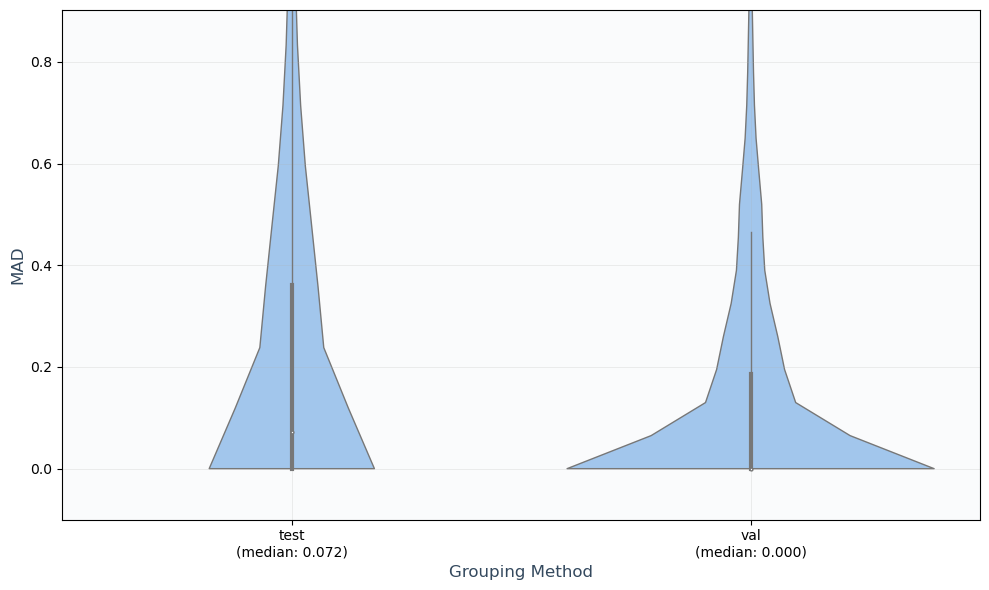

In [186]:
create_MAD_comparison_violinplot([mad_test,mad_val],["test","val"],title="",percentile_cutoff=0.95)

## Regular comparison

In [200]:
mad_test=df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val=df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

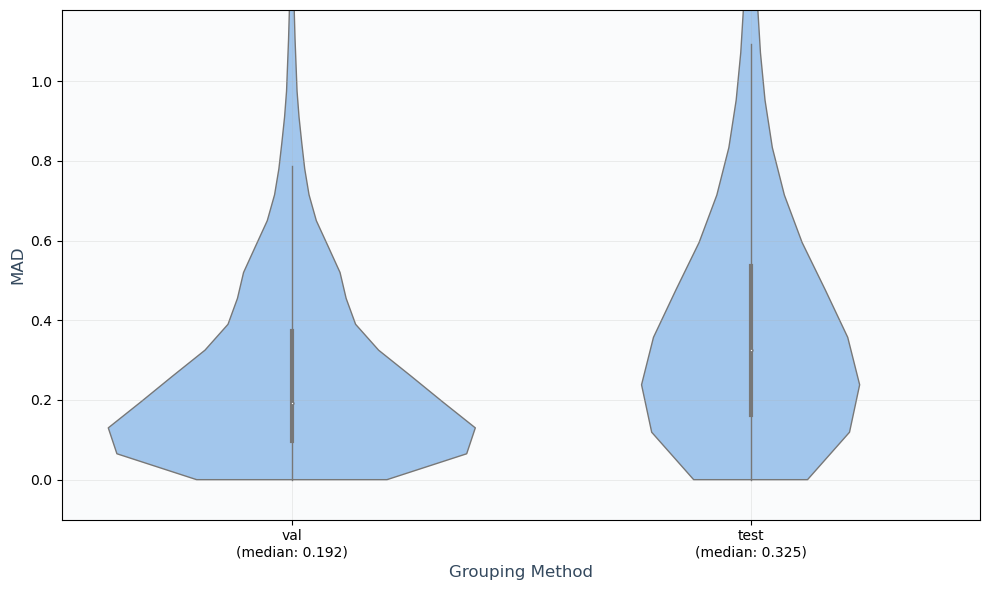

In [202]:
create_MAD_comparison_violinplot([mad_val,mad_test],["val","test"],title="",percentile_cutoff=0.95)

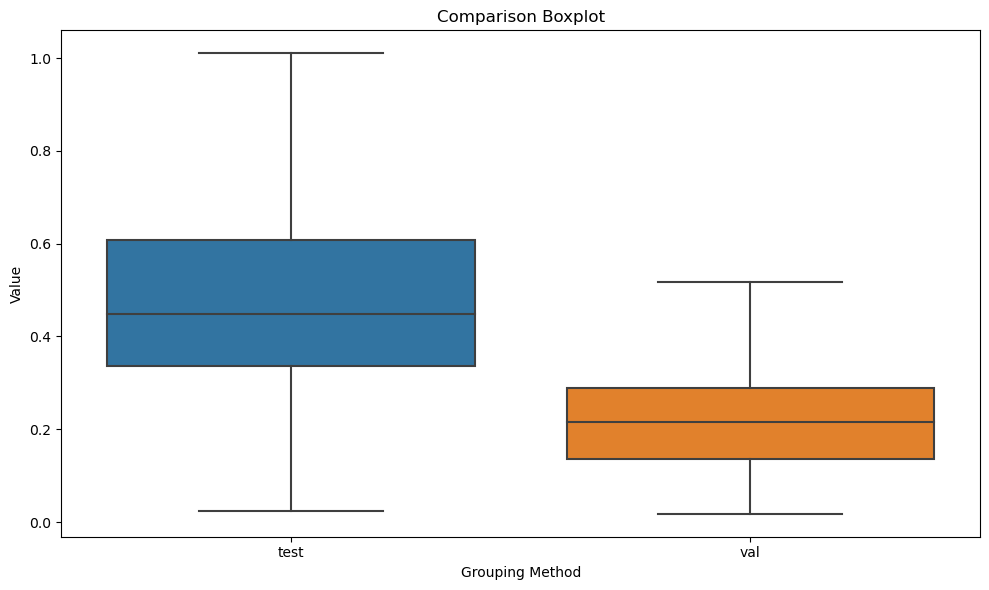

In [189]:
create_MAD_comparison_boxplot([mad_test,mad_val],["test","val"])

## Look for everything below 90th percentile

In [190]:
mad_test = df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_test = np.percentile(mad_test, 90)
indices_90_test =  mad_test[mad_test<=threshold_test].index
df_90_test = df_test[df_test['modified_sequence'].isin(indices_90_test)]

In [191]:
mad_val = df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_val = np.percentile(mad_val, 90)
indices_90_val =  mad_val[mad_val<=threshold_val].index
df_90_val = df_val[df_val['modified_sequence'].isin(indices_90_val)]

In [192]:
mad_test_90=df_90_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val_90=df_90_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

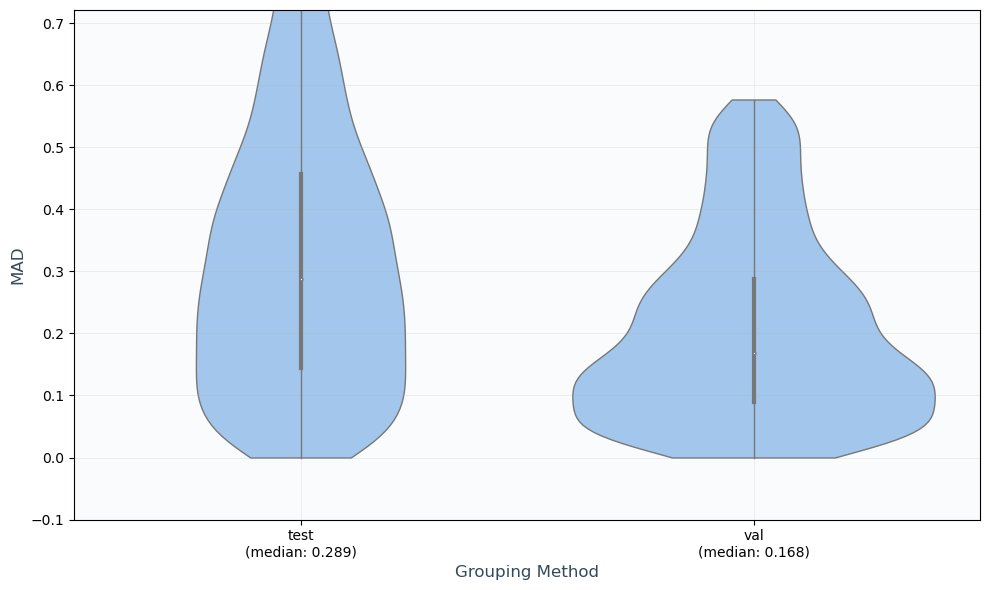

In [193]:
create_MAD_comparison_violinplot([mad_test_90,mad_val_90],["test","val"],percentile_cutoff=0.95)

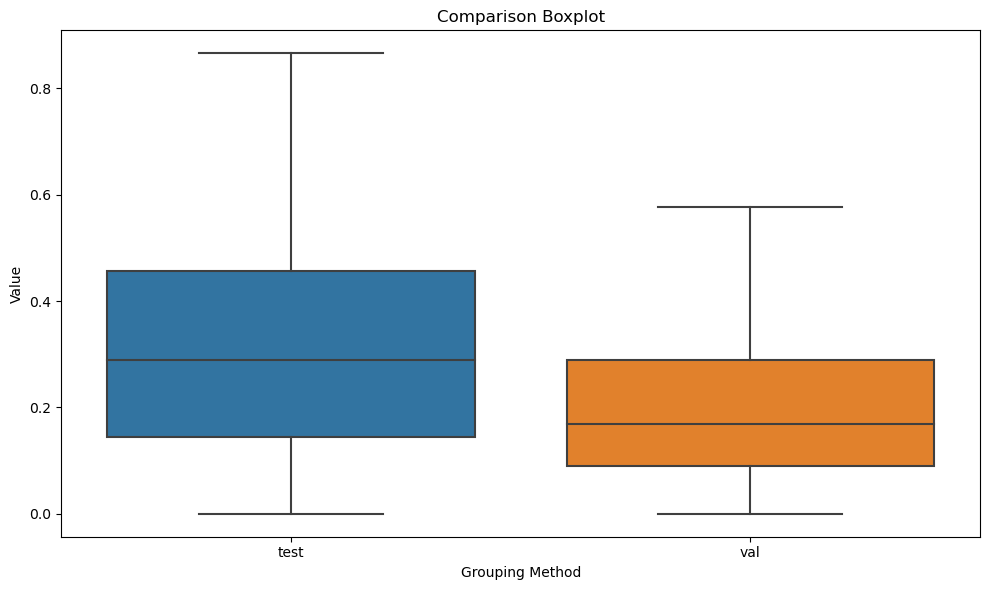

In [194]:
create_MAD_comparison_boxplot([mad_test_90,mad_val_90],["test","val"])

## Look for everything above 90th percentile

In [195]:
mad_test = df_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_test = np.percentile(mad_test, 90)
indices_10_test =  mad_test[mad_test>=threshold_test].index
df_10_test = df_test[df_test['modified_sequence'].isin(indices_10_test)]

In [196]:
mad_val = df_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
threshold_val = np.percentile(mad_val, 90)
indices_10_val =  mad_val[mad_val<=threshold_val].index
df_10_val = df_val[df_val['modified_sequence'].isin(indices_10_val)]

In [197]:
mad_test_10=df_10_test.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()
mad_val_10=df_10_val.groupby('modified_sequence')['predictions'].apply(lambda x: median_absolute_deviation(x,2)).dropna()

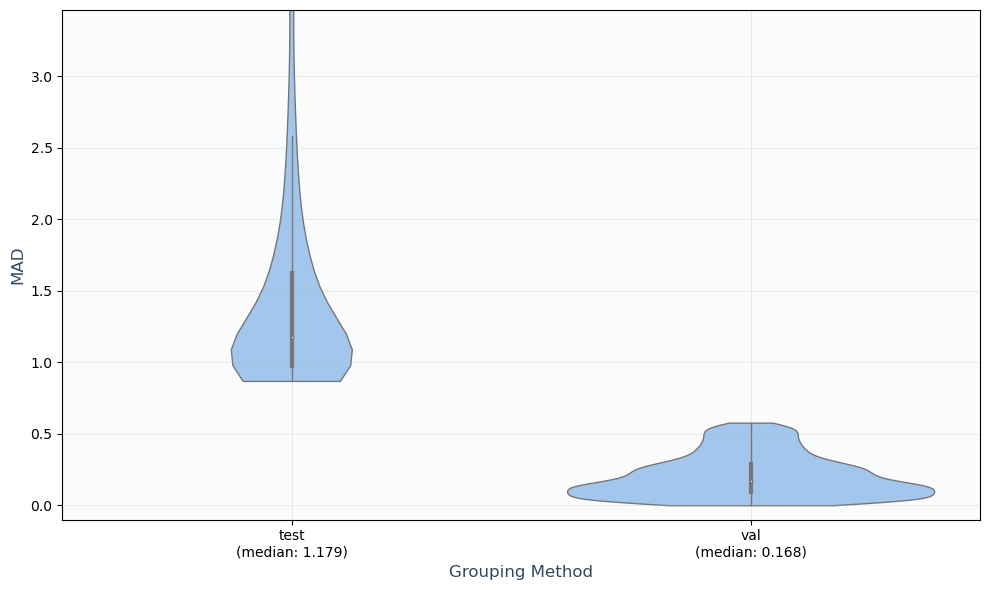

In [198]:
create_MAD_comparison_violinplot([mad_test_10,mad_val_10],["test","val"],percentile_cutoff=0.95)

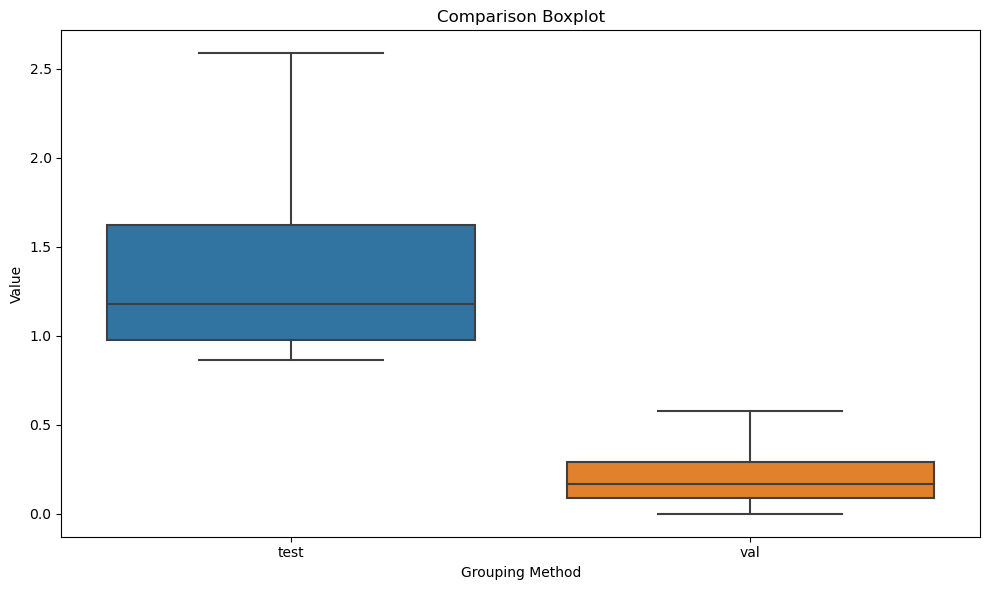

In [199]:
create_MAD_comparison_boxplot([mad_test_10,mad_val_10],["test","val"])

# On training data

In [1]:
pool_predictions_train = "../results/final_models/CONFIG=final_pool,MODE=supervised,PRETRAIN=own,LR=0.0003262821190296,BS=2048,OPTIM=adamw,LOSS=mae,CLIP=True,ACTIVATION=gelu,SCHED=warmup_decay_cos,SIZE=180,NUMLAYERS=9,HIDDENSIZEMLP=120,DROPOUTMLP=0.1,ACTIVATIONMLP=relu,TYPE=pool/version_0/predictions/train_loss=0.1222.csv"

In [6]:
df_train = pd.read_csv(pool_predictions_train, index_col=0)

In [11]:
mad_dataset = df_train.groupby(['modified_sequence', 'dataset'])['predictions'].progress_apply(
    lambda x: median_absolute_deviation(x, 2)
).dropna()

  0%|          | 0/2375409 [00:00<?, ?it/s]

In [13]:
mad_all = df_train.groupby(['modified_sequence'])['predictions'].progress_apply(
    lambda x: median_absolute_deviation(x, 2)
).dropna()

  0%|          | 0/784016 [00:00<?, ?it/s]

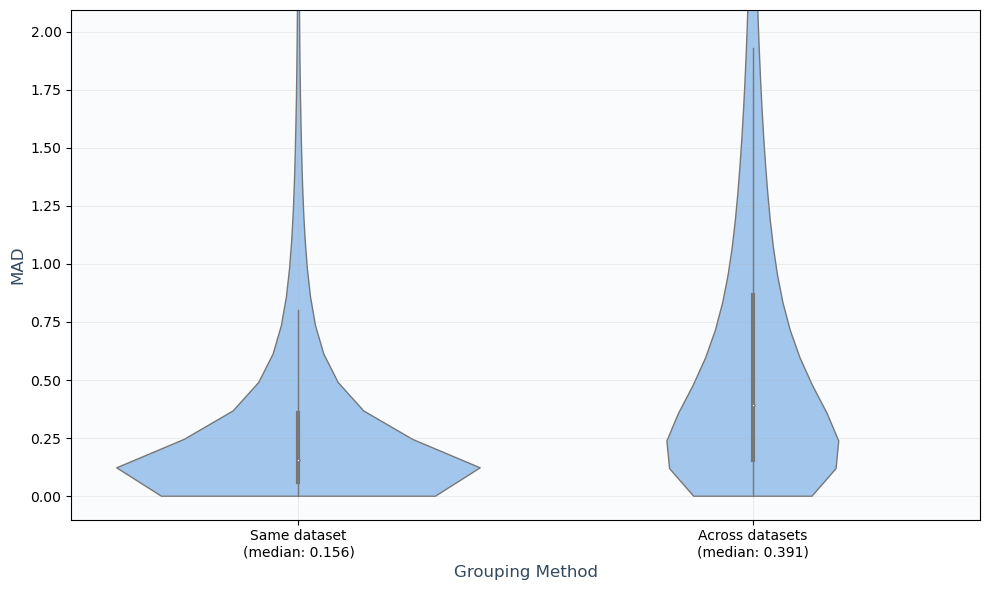

In [14]:
create_MAD_comparison_violinplot([mad_dataset,mad_all],["Same dataset","Across datasets"],title="")